# K-Means for the Morse Code 

In [ ]:
pip install gTTS #Module for conversion of Text to MP3

In [ ]:
pip install pydub #Module for conversion of MP3 to Audio (wav)

Importing the modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import Audio
from scipy.io import wavfile
import time

# Data input into the Code

In [4]:
morse_time=time.clock()

In [5]:
data=pd.read_csv('NITK_exp.csv')

In [6]:
X=data['X']
Y=data['Y']

# Kmeans on Y (Duration)

* Before Clustering

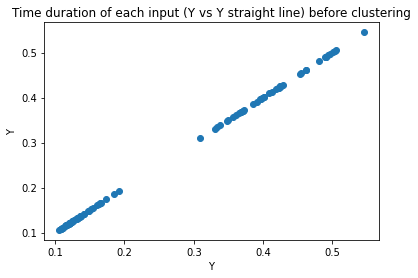

In [7]:
plt.scatter(Y,Y)      #Y vs Y (Time for which button is pressed)
plt.xlabel("Y")
plt.ylabel("Y")
plt.title("Time duration of each input (Y vs Y straight line) before clustering")
plt.show()

Applying the K-means to the Y data (to categorise into dots & dashes)

In [8]:
kmeans_Y=KMeans(n_clusters=2,random_state=42)
df_Y=pd.DataFrame({"y":Y,"Y":Y})
kmeans_Y.fit(df_Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Gathering the labels and the centroids

In [9]:
labels_Y=kmeans_Y.predict(df_Y)
centroids_Y=kmeans_Y.cluster_centers_

* After Clustering

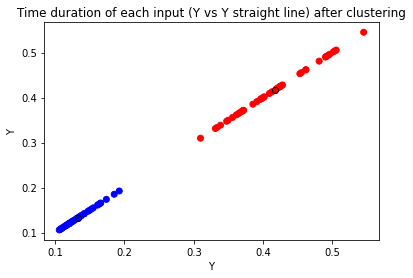

In [10]:
colmap={1:"r",2:"b"}                              #dictionary of colors
colors=map(lambda x: colmap[x+1],labels_Y)          #labels if 0, goes to red, if 1 comes to blue (dot,dash respectively)
colors_list=list(colors)                          #at 0th index in this list,x=0 it means, colmap[1] i.e., red,at 1st index if x=1, colmap[2] i.e., blue.
plt.scatter(df_Y['y'],df_Y["Y"],color=colors_list)
b=[-1,-1]
for i,centroid in enumerate(centroids_Y):
  if(centroid[0]==centroids_Y.min()): b[0]=i                              #if duration is minimum making the label 0 (dot)
  if(centroid[0]==centroids_Y.max()): b[1]=i                              #if duration is maximum making the label 1(dash)
  plt.scatter(*centroid,color=colmap[i+1],edgecolor="k")
plt.xlabel("Y")
plt.ylabel("Y")
plt.title("Time duration of each input (Y vs Y straight line) after clustering")
plt.show()

# Kmeans on X (Time gaps)

* Before Clustering



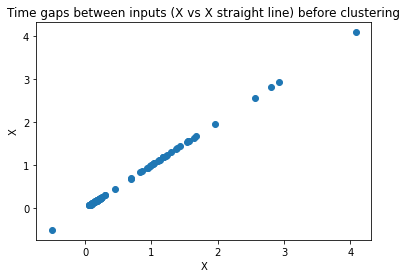

In [11]:
plt.scatter(X,X)
plt.xlabel("X")
plt.ylabel("X")
plt.title("Time gaps between inputs (X vs X straight line) before clustering")
plt.show()

Applying the K-means which results in three clusters

In [12]:
kmeans_X=KMeans(n_clusters=3,random_state=42)
df_X=pd.DataFrame({"x":X,"X":X})
kmeans_X.fit(df_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Gathering the labels and centroid information

In [13]:
labels_X=kmeans_X.predict(df_X)
centroids_X=kmeans_X.cluster_centers_

* After Clustering

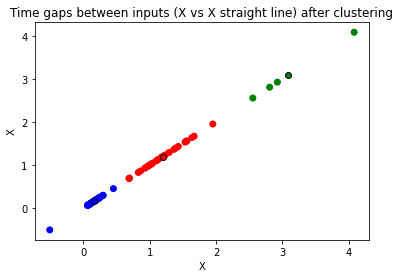

In [14]:
colmap={1:"r",2:"g",3:"b"}                              
colors=map(lambda x: colmap[x+1],labels_X)          
colors_list=list(colors)       
a=[-1,-1,-1]                                                                                  #initialising the list
plt.scatter(df_X['x'],df_X["X"],color=colors_list)
for i,centroid in enumerate(centroids_X):
  if(centroid[0]==centroids_X.min()): a[0]=i                                                  #if gap is minimum making the label 0
  if(centroid[0]==centroids_X.max()):
    a[2]=i
    labels_X[len(labels_X)-1]=i                                                  #if gap is maximunm making the label 2
  if(((centroid[0]!=centroids_X.min())&(centroid[0]!=centroids_X.max()))): a[1]=i
  plt.scatter(*centroid,color=colmap[i+1],edgecolor="k")
plt.xlabel("X")
plt.ylabel("X")
plt.title("Time gaps between inputs (X vs X straight line) after clustering")
plt.show()

# Decoding into Text

Given input has been converted into the following format using Kmeans

In [15]:
df_labels=pd.DataFrame({"X_labels":labels_X,"Y_labels":labels_Y})
print(df_labels)

    X_labels  Y_labels
0          2         0
1          0         1
2          2         1
3          0         0
4          0         0
..       ...       ...
85         2         0
86         2         1
87         0         0
88         2         1
89         1         0

[90 rows x 2 columns]


Dictionary for the morse code evaluation using string compare 

In [16]:
morse_dict={"01":"A","1000":"B","1010":"C","100":"D","0":"E","0010":"F","110":"G","0000":"H","00":"I","0111":"J","101":"K","0100":"L","11":"M","10":"N","111":"O","0110":"P","1101":"Q","010":"R","000":"S","1":"T","001":"U","0001":"V","011":"W","1001":"X","1011":"Y","1100":"Z","11111":"0","01111":"1","00111":"2","00011":"3","00001":"4","00000":"5","10000":"6","11000":"7","11100":"8","11110":"9","010101":".","110011":",","001100":"?","011110":"'","101011":"!","10010":"/","10110":"(","101101":")","01000":"&","111000":":","101010":";","10001":"=","01010":"+","100001":"-","001101":"_","010010":"\"","0001001":"$","011010":"@"}

Initialising the charecter string and word string

In [17]:
charecter=''
word=''

Converting the dots and dashes to the charecters

In [18]:
for x,y in zip(labels_X,labels_Y):                  #Taking the labels sequentially
    k=b.index(y)
    charecter=charecter+np.str(k)
    if(a.index(x)==1):
       # print(charecter)                              #Fetching the index value to define the type of gap '0->dot dash gap' '1->charecter gap' '2->word gap' "sentence gap will be improved further"
        try:
          word=word+morse_dict[charecter]           #Exception handling if the input type or calculation is wrong (i.e. if the combination of dots and dash doesn't form the charecter)
        except KeyError:
          word=word+''                             #Appending * in place of error
        charecter=''
    if(a.index(x)==2):
      try:
          word=word+morse_dict[charecter]           #Exception handling if the input type or calculation is wrong (i.e. if the combination of dots and dash dosen't form the charecter)
      except KeyError:
          word=word+'' 
      charecter=''                             #To add space when word ends
      word=word+' '

In [19]:
#Decoded Text
print(word)

NATIONAL INSTITUTE OF TECHNOLOGY KARNATAKA 


In [20]:
text_time=time.clock()

# Text to Audio Conversion

* Converting Text to Speech.mp3



In [21]:
from gtts import gTTS 
import os

speech = gTTS(text=word, lang='en', slow=False)

speech.save("speech.mp3")
os.system("mpg321 speech.mp3") 
print("Text to MP3 conversion completed")

Text to MP3 conversion completed


In [22]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3("speech.mp3")
sound.export("output.wav", format="wav")
print('MP3 to Wav conversion completed')

MP3 to Wav conversion completed


In [23]:
audio_time=time.clock()

# The Final Audio

In [24]:
audio=Audio('output.wav')
audio

In [25]:
print("Time taken for converting Morse to Text: {} sec".format(text_time-morse_time))
print("Time taken for converting Text to Audio: {} sec".format(audio_time-text_time))
print("Total time of Execution (Morse to Audio): {} sec".format(audio_time-morse_time))

Time taken for converting Morse to Text: 0.89192 sec
Time taken for converting Text to Audio: 0.22862199999999966 sec
Total time of Execution (Morse to Audio): 1.1205419999999997 sec
